In [14]:
def butterworthLP(D0,imgShape):
    M,N=mat_r.shape
    H=np.zeros((M,N), dtype=np.float32)
#D0=10
    n=0.5
    for u in range(M):
        for v in range(N):
            D=np.sqrt((u-M/2)**2+(v-N/2)**2)
            H[u,v]=1/(1+(D/D0)**(2*n))
    return H

def butterworthHP(D0,imgShape):
    M,N=mat_r.shape
    H=np.zeros((M,N), dtype=np.float32)
#D0=10
    n=0.5
    for u in range(M):
        for v in range(N):
            D=np.sqrt((u-M/2)**2+(v-N/2)**2)
            H[u,v]=1-(1/(1+(D/D0)**(2*n)))
    return H

In [30]:
# -*- coding: utf-8 -*-
"""
Created on Thu Feb  2 02:18:36 2023

@author: Alexandros
"""

# Machine learning model code goes here
#first load the train and test data set
import os
import pandas as pd
import numpy as np
from visualise import plot_digi_fig
import matplotlib.pyplot as plt
from dataloader import  FFT_transform_ST

entries = os.listdir('Data/')
#print(entries)
train_data=[k for k in entries if 'train' in k]
#print(train_data)

X_title_train=[]
X_data_train = []


for entry in train_data:
    name=entry
    
    res = "".join([ele for ele in entry if ele.isdigit()])  # keep only the integer part of the path
    #print(entry)
    with open('Data/'+name) as f:
        #print(f)
        for line in f:
            curr = line.strip()
            mat = np.fromstring(curr, dtype=int, sep='  ')
            mat_r = np.reshape(mat, (-1, 15))
    
            #here we apply the FFT transform
            #X_data_train.append(np.array(FFT_transform_ST(mat_r)))
            [amp,phase]=np.array(FFT_transform_ST(mat_r))
            LowPassamp=amp*butterworthHP(10,amp.shape)
            LowPassphase=phase*butterworthHP(10,amp.shape)
            X_data_train.append(np.array([LowPassamp,LowPassphase]))
            

            X_title_train.append(int(res))

X_data_train = np.array(X_data_train)  
  
test_data=[k for k in entries if 'test' in k]
#print(test_data)

#create nested lists for storing reasons
X_title_test=[]
X_data_test = []



for entry in test_data:
    name=entry
    
    res = "".join([ele for ele in entry if ele.isdigit()])  # keep only the integer part of the path
    #print(entry)
    with open('Data/'+name) as f:
        #print(f)
        for line in f:
            curr = line.strip()
            mat = np.fromstring(curr, dtype=int, sep='  ')
            mat_r = np.reshape(mat, (-1, 15))   

            #X_data_test.append(np.array(FFT_transform_ST(mat_r)))
            [amp,phase]=np.array(FFT_transform_ST(mat_r))
            LowPassamp=amp*butterworthHP(10,amp.shape)
            LowPassphase=phase*butterworthHP(10,amp.shape)
            X_data_test.append(np.array([LowPassamp,LowPassphase]))
 
            X_title_test.append(int(res))
   
X_data_test = np.array( X_data_test)      


X_train_lable = X_title_train
X_test_lable = X_title_test
#print(res_test)
#print(X_title_train)








1000
[[[ 3.30242498e+00  3.18683415e+00  3.55181319e+00  3.84903196e+00
    7.64562924e+00  9.08534770e+00  2.44491582e+00  5.55074215e-01
    2.46171690e+00  9.20661587e+00  7.79145674e+00  3.94080933e+00
    3.64986742e+00  3.28377699e+00  3.40944315e+00]
  [ 2.37032193e+00  2.73754851e+00  1.81179064e+00  3.07596074e+00
    1.01037943e+01  9.24737184e+00  8.68484145e+00  7.09303795e+00
    4.69286805e+00  2.27348948e+00  4.89386291e+00  3.98557640e+00
    9.08763131e+00  9.81818817e+00  3.56688985e+00]
  [ 6.69379904e+00  6.63293116e+00  1.09936952e+01  9.22321060e+00
    5.03490736e+00  7.79441096e+00  9.65629163e+00  5.08699993e+00
    7.15482533e+00  8.27515861e+00  5.97548967e+00  4.93914194e+00
    7.11437470e+00  4.09020277e+00  4.46133834e+00]
  [ 9.07903799e+00  5.77789531e-01  2.17502205e+00  8.12456100e+00
    1.10463799e+01  1.39152324e+01  2.00550791e+01  2.49069330e+01
    1.48047935e+01  1.28665588e+01  1.01378908e+01  2.50438537e+00
    6.01736738e+00  3.74999013e+00 

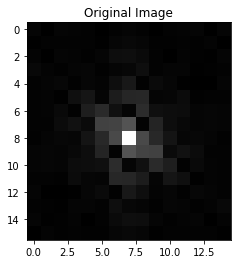

In [28]:
print(len(X_data_train))
print((X_data_train[1]))
print(len(X_data_train[1]))
print(len(X_train_lable))
[x,y]=FFT_transform_ST(mat_r)
print('x')
print(x)
print('y')
print(y)
plt.imshow(x, "gray"), plt.title("Original Image")
[amp,phase]=np.array(FFT_transform_ST(mat_r))
print(mat_r.shape)
print(amp.shape)


LR: accuracy WITHOUT parameter tuning:
82.4
LR: accuracy WITH parameter tuning:
82.8
              precision    recall  f1-score   support

           0       0.89      0.93      0.91       100
           1       0.89      0.92      0.91       100
           2       0.81      0.86      0.83       100
           3       0.87      0.87      0.87       100
           4       0.95      0.82      0.88       100
           5       0.78      0.80      0.79       100
           6       0.63      0.57      0.60       100
           7       0.89      0.93      0.91       100
           8       0.96      0.87      0.91       100
           9       0.60      0.67      0.63       100

    accuracy                           0.82      1000
   macro avg       0.83      0.82      0.82      1000
weighted avg       0.83      0.82      0.82      1000



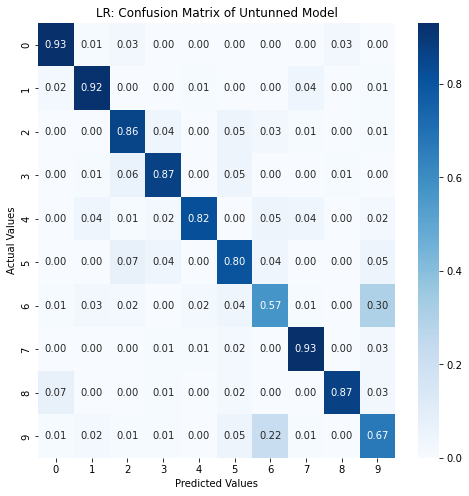

              precision    recall  f1-score   support

           0       0.90      0.91      0.91       100
           1       0.88      0.90      0.89       100
           2       0.81      0.82      0.82       100
           3       0.85      0.88      0.87       100
           4       0.94      0.84      0.89       100
           5       0.80      0.80      0.80       100
           6       0.60      0.64      0.62       100
           7       0.94      0.94      0.94       100
           8       0.93      0.87      0.90       100
           9       0.65      0.68      0.67       100

    accuracy                           0.83      1000
   macro avg       0.83      0.83      0.83      1000
weighted avg       0.83      0.83      0.83      1000



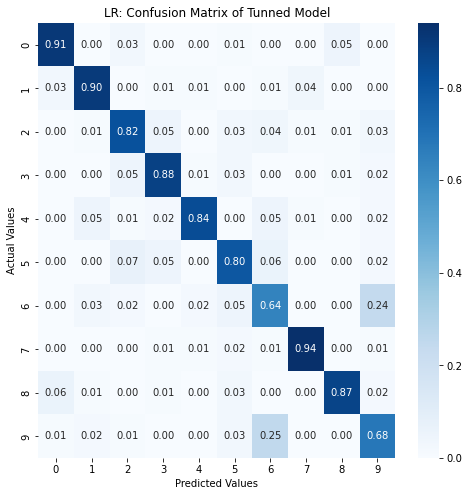

In [31]:
from sklearn.model_selection import GridSearchCV
import seaborn as sns
from sklearn.metrics import classification_report, confusion_matrix
import warnings
warnings.filterwarnings('ignore') # I use that here as the GridSearchCV function generates a number of warning cluttering your console

from sklearn.linear_model import LogisticRegression


############################--------------Linear Regression-----------##############################

x_train = X_data_train
x_train = x_train.reshape(1000,-1)
y_train = X_title_train

x_test= X_data_test
x_test = x_test.reshape(1000,-1)
y_test= X_title_test

logR = LogisticRegression()
logR2= LogisticRegression()
parameters_lr = {
    'penalty' : ['l1','l2'], 
    'C'       : np.logspace(-3,3,7),
    'solver'  : ['newton-cg', 'lbfgs', 'liblinear'],}

lrGrid1 = GridSearchCV(logR,
                   param_grid = parameters_lr,
                   scoring='accuracy',
                   cv=2) # here I only selected 2 iteration of the CV as higher values significantly increase the computation time

lr_b= lrGrid1

lr_b.fit(x_train,y_train)




#check accuracy without parameter tuning 
test_np = logR.fit(x_train,y_train)
fft_pred_np= test_np.predict(x_test)
#check predictions with tunned model
fft_pred_p= lr_b.predict(x_test)



print("LR: accuracy WITHOUT parameter tuning:")
print(round(sum(fft_pred_np==y_test)/len(y_test)*100,1))


print("LR: accuracy WITH parameter tuning:")
print(round(sum(fft_pred_p==y_test)/len(y_test)*100,1))





cm1 = confusion_matrix(y_test, fft_pred_np,normalize='true')
labels = ['0','1','2','3','4','5','6','7','8','9']
print(classification_report(y_test, fft_pred_np)) 
fig, ax = plt.subplots(figsize=(8,8))
sns_plot = sns.heatmap(cm1, annot=True, fmt='.2f', cmap='Blues',xticklabels=labels, yticklabels=labels)
plt.ylabel('Actual Values')
plt.xlabel('Predicted Values')

plt.title('LR: Confusion Matrix of Untunned Model')
plt.show()
fig.savefig('Conf_Matrix_LR_Untunned.png',bbox_inches='tight',dpi=150)

cm2 = confusion_matrix(y_test, fft_pred_p,normalize='true')
labels = ['0','1','2','3','4','5','6','7','8','9']
print(classification_report(y_test, fft_pred_p)) 
fig, ax = plt.subplots(figsize=(8,8))
sns_plot = sns.heatmap(cm2, annot=True, fmt='.2f', cmap='Blues',xticklabels=labels, yticklabels=labels)
plt.ylabel('Actual Values')
plt.xlabel('Predicted Values')

plt.title('LR: Confusion Matrix of Tunned Model')
plt.show()
#fig.savefig('Conf_Matrix_LR_Tunned.png',bbox_inches='tight',dpi=150)




In [42]:
amp_new=amp.flatten()
print(amp_new.shape)
ind=[1,2,3]
amp_new=amp_new[ind]
print(amp_new)

(240,)
[ 2.82610056 13.45362405 10.56851328]
